# Primer Parcial Módulo 3 generación 12

Se tiene una tabla transaccional, que contiene las compras realizadas por los clientes, a nivel elemento del ticket. La intención de este negocio, es diseñar un programa de lealtad por lo cual, necesita identificar diversos segmentos de sus clientes. Como esto es un primer ensayo de este requerimiento, la compañía requiere que se identifique de forma adecuada el número de segmentos que podría crear, dependiendo del comportamiento de sus clientes. 

Tomando esto en cuenta, emplee las técnicas vistas en clase, para proponer una alternativa para la compañía, realizando un análisis exploratorio de los datos encontrados para los clientes, el comportamiento de estos, la propuesta de subgrupos y los resultados obtenidos. Así como el planteamiento de cuál sería la base para este programa de lealtad (es decir, ¿cuántos conjuntos son?, ¿cuál fue la técnica empleada para la selección de dichos conjuntos?, ¿que hallazgos se tienen respecto al comportamiento de sus clientes?, etc...). 

Un ejemplo del flujo podría ser el siguiente:

* 1. Exploración e identificación de los datos y la unidad muestral requerida.
* 2. Diseño y selección de las variables a observar para crear la segmentación.
* 3. Representación de los espacios en una proyección.
* 4. Propuestas de algoritmos y segmentos.
* 5. Ajuste de los algoritmos.
* 6. Evaluación de los resultados (análisis del sentido de los subgrupos).
* 7. Nombrar los subgrupos con base a lo encontrado en cada uno.
    * Ejemplo: En el caso de los clubes, pudimos haber nombrado al grupo de alto nivel de transacciones que eran 19 con transacciones superiores a 70, como el grupo de los "ricos". Por otra parte el grupo sin compras, y con muchas ventas puede ser denominado los "canteranos", porque desarrollan jugadores y los vende. La idea es crear estos nombres para los segmentos de clientes que ustedes creen. 
* 8. Realizar el análisis de negocio e identificar los beneficios de aplicar el programa de lealtad. Alguna propuesta de programa de recompensas basado en el nivel de lealtad del cliente. 
* 9. Reealizar la presentación de negocio con esta información.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
data_path = '../../data/modulo3/dataexam1/'
df = pd.read_csv(data_path + 'Retail Transactions.csv', encoding='latin')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

# 1. Exploración e identificación de los datos y la unidad muestral requerida.

Definimos la TAD como:
* Unidad muestral: CustomerID
    - Es interno o externo (está en Reino Unido o es de fuera)
    - Transacciones de promoción = cuando el precio = 0
    - Transacciones de devolución = cuando precio < 0
    - Transacciones de compra = cuando precio > 0
    - Transacciones totales
    - Conteo de ingresos totales por cliente (suma total de las transacciones)
    - Artículos por transacción
    - Cantidad total de artículos
    - Compras por trimestre


In [2]:
df.shape

(541909, 8)

In [3]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [4]:
df['Country'].value_counts(1)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [5]:
df[['Quantity', 'UnitPrice']].describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

Debido al porcentaje de participación del Reino Unido en las transacciones, se definirá una categoría Reino Unido y Fuera del Reino Unido.

In [6]:
df['Country'] = df['Country'].apply(lambda x: 'Inside UK' if 'United Kingdom' in x else 'Outside UK' )

In [7]:
df['Country'].value_counts(1)

Inside UK     0.91432
Outside UK    0.08568
Name: Country, dtype: float64

In [8]:
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month

In [9]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID    Country  month  
0  12/1/2010 8:26       2.55     17850.0  Inside UK     12  
1  12/1/2010 8:26       3.39     17850.0  Inside UK     12  
2  12/1/2010 8:26       2.75     17850.0  Inside UK     12  
3  12/1/2010 8:26       3.39     17850.0  Inside UK     12  
4  12/1/2010 8:26       3.39     17850.0  Inside UK     12  
5  12/1/2010 8:26       7.65     17850.0  Inside UK     12  
6  12/1/2010 8:26       4.25     17850.0  Inside UK     12  
7  12/1/2010 8:28       1.85     17850.0  Inside UK     12  
8  12/1/2010 8:28       1.85     17850.0  Inside UK     12  
9  12/1/2010 8:34       1.69     13047.0  Inside UK     12

In [10]:
df.tail(10)

InvoiceNo StockCode                      Description  Quantity  \
541899    581587     22726       ALARM CLOCK BAKELIKE GREEN         4   
541900    581587     22730       ALARM CLOCK BAKELIKE IVORY         4   
541901    581587     22367  CHILDRENS APRON SPACEBOY DESIGN         8   
541902    581587     22629              SPACEBOY LUNCH BOX         12   
541903    581587     23256      CHILDRENS CUTLERY SPACEBOY          4   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID     Country  month  
541899  12/9/2011 12:50       3.75     12680.0  Outside UK     12  
541900  12/9/2011 12:50       3.75     12680.0  Outside UK     12  
541901  12/9/2011 12:50       1.95     12680.0  Outside UK     12  
541902  12/9/2011 12:50       1.95     12680.0  Outside UK     12  
541903  12/9/2011 12:50       4.15     12680.0  Outside UK     12  
541904  12/9/2011 12:50       0.85     12680.0  Outside UK     12  
541905  12/9/2011 12:50       2.10     12680.0  Outside UK     12  
541906  12/9/2011 12:50       4.15     12680.0  Outside UK     12  
541907  12/9/2011 12:50       4.15     12680.0  Outside UK     12  
541908  12/9/2011 12:50       4.95     12680.0  Outside UK     12

In [11]:
df['month'].value_counts(1)

11    0.156320
12    0.125493
10    0.112089
9     0.092683
7     0.072924
5     0.068333
6     0.068045
3     0.067812
8     0.065111
1     0.064858
4     0.055205
2     0.051129
Name: month, dtype: float64

In [12]:
from math import ceil
df['Q']=df['month'].map(lambda x:ceil(x/3))

In [13]:
df['Q'].value_counts(1)

4    0.393902
3    0.230718
2    0.191582
1    0.183798
Name: Q, dtype: float64

In [14]:
df['CustomerID'].value_counts(1, dropna=False)

NaN        0.249267
17841.0    0.014731
14911.0    0.010893
14096.0    0.009463
12748.0    0.008566
             ...   
13270.0    0.000002
17763.0    0.000002
17291.0    0.000002
15668.0    0.000002
15562.0    0.000002
Name: CustomerID, Length: 4373, dtype: float64

<AxesSubplot:>

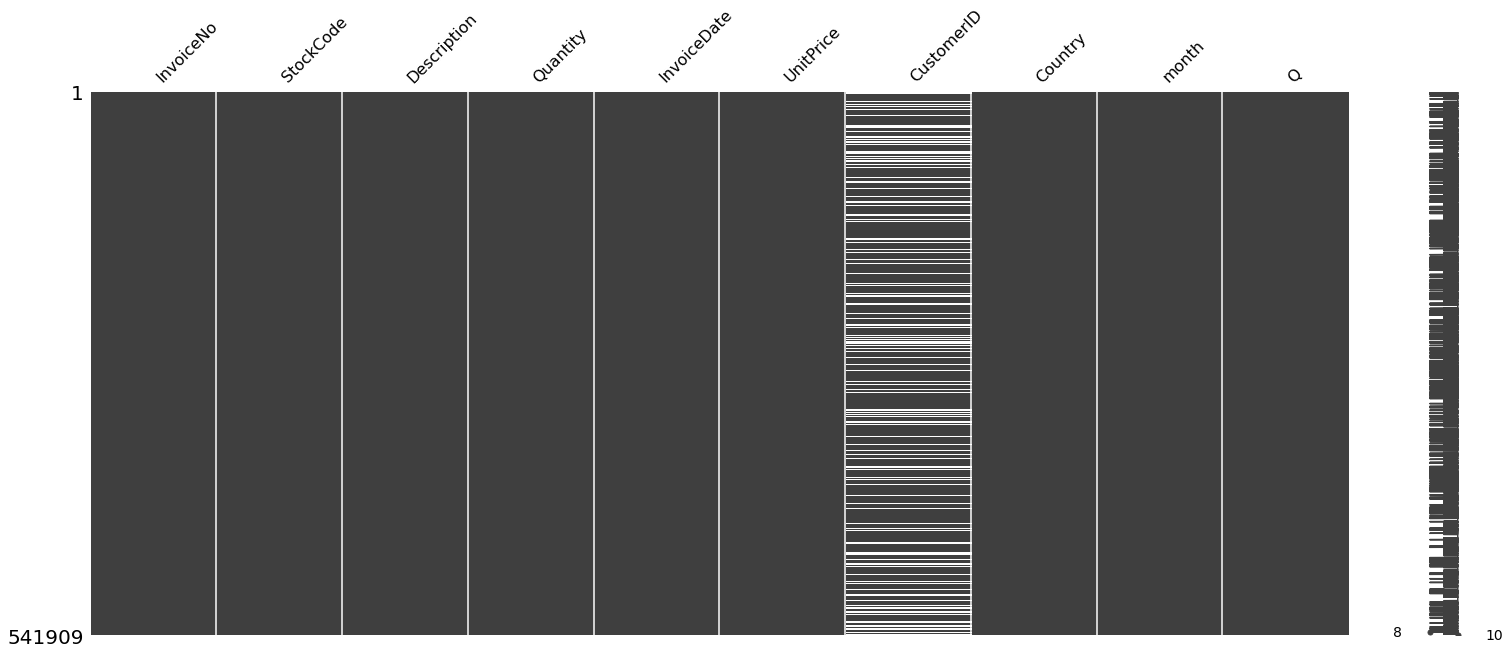

In [15]:
import missingno as msno
msno.matrix(df)

In [16]:
df[df.isna().any(axis=1)]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID    Country  month  Q  
622     12/1/2010 11:52       0.00         NaN  Inside UK     12  4  
1443    12/1/2010 14:32       2.51         NaN  Inside UK     12  4  
1444    12/1/2010 14:32       2.51         NaN  Inside UK     12  4  
1445    12/1/2010 14:32       0.85         NaN  Inside UK     12  4  
1446    12/1/2010 14:32       1.66         NaN  Inside UK     12  4  
...                 ...        ...         ...        ...    ... ..  
541536  12/9/2011 10:26       4.13         NaN  Inside UK     12  4  
541537  12/9/2011 10:26       4.13         NaN  Inside UK     12  4  
541538  12/9/2011 10:26       4.96         NaN  Inside UK     12  4  
541539  12/9/2011 10:26      10.79         NaN  Inside UK     12  4  
541540  12/9/2011 10:26    1714.17         NaN  Inside UK     12  4  

[135080 rows x 10 columns]

In [17]:
# Como se trada de una campaña de lealtad, no centraremos en los clientes.
# Es por ello que se pueden eliminar los registros vacíos.
df_no = df[df.isna().any(axis=1)] #Guardamos los no clientes para un análisis posterior
df.dropna(inplace=True)

In [18]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID    Country  month  Q  
0  12/1/2010 8:26       2.55     17850.0  Inside UK     12  4  
1  12/1/2010 8:26       3.39     17850.0  Inside UK     12  4  
2  12/1/2010 8:26       2.75     17850.0  Inside UK     12  4  
3  12/1/2010 8:26       3.39     17850.0  Inside UK     12  4  
4  12/1/2010 8:26       3.39     17850.0  Inside UK     12  4

In [19]:
df['UnitPrice'].describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [20]:
df['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [21]:
df.loc[df['Quantity'] < -80000 ]

InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

           InvoiceDate  UnitPrice  CustomerID    Country  month  Q  
540422  12/9/2011 9:27       2.08     16446.0  Inside UK     12  4

In [22]:
df.loc[df['Quantity'] > 80000 ]

InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

           InvoiceDate  UnitPrice  CustomerID    Country  month  Q  
540421  12/9/2011 9:15       2.08     16446.0  Inside UK     12  4

In [23]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID    Country  month  Q  
0  12/1/2010 8:26       2.55     17850.0  Inside UK     12  4  
1  12/1/2010 8:26       3.39     17850.0  Inside UK     12  4  
2  12/1/2010 8:26       2.75     17850.0  Inside UK     12  4  
3  12/1/2010 8:26       3.39     17850.0  Inside UK     12  4  
4  12/1/2010 8:26       3.39     17850.0  Inside UK     12  4

In [24]:
df['total_money_transaction'] = df['Quantity'] * df['UnitPrice']

# 2. Diseño y selección de las variables a observar para crear la segmentación.
Definimos la TAD como:
* Unidad muestral: CustomerID
    - Es interno o externo (está en Reino Unido o es de fuera)
    - Transacciones de promoción = cantidad = 0
    - Transacciones de devolución = cantidas < 0
    - Transacciones de compra = cantidad > 0
    - Transacciones totales
    - Conteo de ingresos totales por cliente (suma total de las transacciones)
    - Artículos por transacción
    - Compras por trimestre


In [25]:
#df_count = df.groupby('team')['points'].apply(lambda x: (x>15).sum()).reset_index(name='count')

devoluciones = df.groupby('CustomerID')['Quantity'].apply(lambda x: (x<0).sum())
compras = df.groupby('CustomerID')['Quantity'].apply(lambda x: (x>0).sum())
compras_desc = df.groupby('CustomerID')['Quantity'].apply(lambda x: (x==0).sum())

In [26]:
compras

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: Quantity, Length: 4372, dtype: int64

In [27]:
tad = df[['CustomerID', 'Country']].groupby(['CustomerID', 'Country']).sum()

In [28]:
tad.reset_index(inplace=True, level=['Country'])
tad.reset_index(inplace=True, level=['CustomerID'])

In [29]:
compras = pd.DataFrame(compras)
devoluciones = pd.DataFrame(devoluciones)
compras_desc = pd.DataFrame(compras_desc)

In [30]:
compras.rename(columns={'Quantity': 'tot_purch'}, inplace=True)
devoluciones.rename(columns={'Quantity': 'tot_dev'}, inplace=True)
compras_desc.rename(columns={'Quantity': 'off_purch'}, inplace=True)

In [31]:
tad

CustomerID     Country
0        12346.0   Inside UK
1        12347.0  Outside UK
2        12348.0  Outside UK
3        12349.0  Outside UK
4        12350.0  Outside UK
...          ...         ...
4367     18280.0   Inside UK
4368     18281.0   Inside UK
4369     18282.0   Inside UK
4370     18283.0   Inside UK
4371     18287.0   Inside UK

[4372 rows x 2 columns]

In [32]:
tad = tad.merge(compras, left_on='CustomerID', right_on=compras.index)
tad = tad.merge(devoluciones, left_on='CustomerID', right_on=devoluciones.index)
tad = tad = tad.merge(compras_desc, left_on='CustomerID', right_on=compras_desc.index)

In [33]:
tad

CustomerID     Country  tot_purch  tot_dev  off_purch
0        12346.0   Inside UK          1        1          0
1        12347.0  Outside UK        182        0          0
2        12348.0  Outside UK         31        0          0
3        12349.0  Outside UK         73        0          0
4        12350.0  Outside UK         17        0          0
...          ...         ...        ...      ...        ...
4367     18280.0   Inside UK         10        0          0
4368     18281.0   Inside UK          7        0          0
4369     18282.0   Inside UK         12        1          0
4370     18283.0   Inside UK        756        0          0
4371     18287.0   Inside UK         70        0          0

[4372 rows x 5 columns]

In [34]:
tad['tot_tansactions'] = tad['tot_purch'] + tad['tot_dev'] + tad['off_purch']

In [35]:
tad.head()

CustomerID     Country  tot_purch  tot_dev  off_purch  tot_tansactions
0     12346.0   Inside UK          1        1          0                2
1     12347.0  Outside UK        182        0          0              182
2     12348.0  Outside UK         31        0          0               31
3     12349.0  Outside UK         73        0          0               73
4     12350.0  Outside UK         17        0          0               17

In [36]:
df.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

      InvoiceDate  UnitPrice  CustomerID    Country  month  Q  \
0  12/1/2010 8:26       2.55     17850.0  Inside UK     12  4   
1  12/1/2010 8:26       3.39     17850.0  Inside UK     12  4   

   total_money_transaction  
0                    15.30  
1                    20.34

In [37]:
ingresos = df.groupby('CustomerID')['total_money_transaction'].sum()

In [38]:
ingresos = pd.DataFrame(ingresos)
ingresos.rename(columns={'Total_transaction':'total_money'}, inplace=True)

In [39]:
tad = tad.merge(ingresos, left_on = 'CustomerID', right_on=ingresos.index)

In [40]:
tad

CustomerID     Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
0        12346.0   Inside UK          1        1          0                2   
1        12347.0  Outside UK        182        0          0              182   
2        12348.0  Outside UK         31        0          0               31   
3        12349.0  Outside UK         73        0          0               73   
4        12350.0  Outside UK         17        0          0               17   
...          ...         ...        ...      ...        ...              ...   
4367     18280.0   Inside UK         10        0          0               10   
4368     18281.0   Inside UK          7        0          0                7   
4369     18282.0   Inside UK         12        1          0               13   
4370     18283.0   Inside UK        756        0          0              756   
4371     18287.0   Inside UK         70        0          0               70   

      total_money_transaction  
0                        0.00  
1                     4310.00  
2                     1797.24  
3                     1757.55  
4                      334.40  
...                       ...  
4367                   180.60  
4368                    80.82  
4369                   176.60  
4370                  2094.88  
4371                  1837.28  

[4372 rows x 7 columns]

In [41]:
df.loc[df['CustomerID'] == 12346]

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   

           InvoiceDate  UnitPrice  CustomerID    Country  month  Q  \
61619  1/18/2011 10:01       1.04     12346.0  Inside UK      1  1   
61624  1/18/2011 10:17       1.04     12346.0  Inside UK      1  1   

       total_money_transaction  
61619                  77183.6  
61624                 -77183.6

In [42]:
df.loc[df['CustomerID'] == 12346]

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   

           InvoiceDate  UnitPrice  CustomerID    Country  month  Q  \
61619  1/18/2011 10:01       1.04     12346.0  Inside UK      1  1   
61624  1/18/2011 10:17       1.04     12346.0  Inside UK      1  1   

       total_money_transaction  
61619                  77183.6  
61624                 -77183.6

In [43]:
## TAD CHECKPOINT ##
tad.to_excel(data_path + 'tad_checkpoint.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
df.head(2)

In [44]:
media_por_compra = df.groupby(['CustomerID'])['Quantity'].agg('mean')
media_por_compra = pd.DataFrame(media_por_compra)
media_por_compra.rename(columns={'Quantity':'mean_x_transaction'}, inplace=True)
tad = tad.merge(media_por_compra, left_on='CustomerID', right_on=media_por_compra.index)

In [45]:
df.groupby(['CustomerID'])['UnitPrice'].agg('mean')

CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
12349.0    8.289041
12350.0    3.841176
             ...   
18280.0    4.765000
18281.0    5.622857
18282.0    4.821538
18283.0    1.614987
18287.0    1.493571
Name: UnitPrice, Length: 4372, dtype: float64

In [46]:
media_por_compra_dineros = df.groupby(['CustomerID'])['UnitPrice'].agg('mean')
media_por_compra_dineros = pd.DataFrame(media_por_compra_dineros)
media_por_compra_dineros.rename(columns={'UnitPrice':'mean_unit_price'}, inplace=True)
tad = tad.merge(media_por_compra_dineros, left_on='CustomerID', right_on=media_por_compra_dineros.index)

In [47]:
tad.head(3)

CustomerID     Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
0     12346.0   Inside UK          1        1          0                2   
1     12347.0  Outside UK        182        0          0              182   
2     12348.0  Outside UK         31        0          0               31   

   total_money_transaction  mean_x_transaction  mean_unit_price  
0                     0.00            0.000000         1.040000  
1                  4310.00           13.505495         2.644011  
2                  1797.24           75.516129         5.764839

In [49]:
df.to_excel(data_path + 'df_chpnt.xlsx')

In [50]:
total_per_Q = pd.pivot_table(df, values='InvoiceNo', index=['CustomerID'], columns=['Q'], aggfunc='count')
total_per_Q.fillna(value=0, inplace=True)
total_per_Q

Q               1      2      3      4
CustomerID                            
12346.0       2.0    0.0    0.0    0.0
12347.0      29.0   42.0   22.0   89.0
12348.0       6.0    5.0    3.0   17.0
12349.0       0.0    0.0    0.0   73.0
12350.0      17.0    0.0    0.0    0.0
...           ...    ...    ...    ...
18280.0      10.0    0.0    0.0    0.0
18281.0       0.0    7.0    0.0    0.0
18282.0       0.0    0.0    8.0    5.0
18283.0     132.0  211.0  104.0  309.0
18287.0       0.0   29.0    0.0   41.0

[4372 rows x 4 columns]

In [51]:
tad = tad.merge(total_per_Q, left_on='CustomerID', right_on=total_per_Q.index)

In [52]:
tad.head(5)

CustomerID     Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
0     12346.0   Inside UK          1        1          0                2   
1     12347.0  Outside UK        182        0          0              182   
2     12348.0  Outside UK         31        0          0               31   
3     12349.0  Outside UK         73        0          0               73   
4     12350.0  Outside UK         17        0          0               17   

   total_money_transaction  mean_x_transaction  mean_unit_price     1     2  \
0                     0.00            0.000000         1.040000   2.0   0.0   
1                  4310.00           13.505495         2.644011  29.0  42.0   
2                  1797.24           75.516129         5.764839   6.0   5.0   
3                  1757.55            8.643836         8.289041   0.0   0.0   
4                   334.40           11.588235         3.841176  17.0   0.0   

      3     4  
0   0.0   0.0  
1  22.0  89.0  
2   3.0  17.0  
3   0.0  73.0  
4   0.0   0.0

In [53]:
tad.tail(5)

CustomerID    Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
4367     18280.0  Inside UK         10        0          0               10   
4368     18281.0  Inside UK          7        0          0                7   
4369     18282.0  Inside UK         12        1          0               13   
4370     18283.0  Inside UK        756        0          0              756   
4371     18287.0  Inside UK         70        0          0               70   

      total_money_transaction  mean_x_transaction  mean_unit_price      1  \
4367                   180.60            4.500000         4.765000   10.0   
4368                    80.82            7.714286         5.622857    0.0   
4369                   176.60            7.538462         4.821538    0.0   
4370                  2094.88            1.847884         1.614987  132.0   
4371                  1837.28           22.657143         1.493571    0.0   

          2      3      4  
4367    0.0    0.0    0.0  
4368    7.0    0.0    0.0  
4369    0.0    8.0    5.0  
4370  211.0  104.0  309.0  
4371   29.0    0.0   41.0

In [54]:
tad.rename(columns={
    1 : 'Q1',
    2 : 'Q2',
    3 : 'Q3',
    4 : 'Q4'
},inplace=True)

In [55]:
#Codificación de la variable Country
tad['Country'].replace({'Inside UK':1, 'Outside UK':0}, inplace=True)

In [56]:
tad.set_index('CustomerID', inplace=True)

In [57]:
# La TAD propuesta está lista
tad

Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
CustomerID                                                            
12346.0           1          1        1          0                2   
12347.0           0        182        0          0              182   
12348.0           0         31        0          0               31   
12349.0           0         73        0          0               73   
12350.0           0         17        0          0               17   
...             ...        ...      ...        ...              ...   
18280.0           1         10        0          0               10   
18281.0           1          7        0          0                7   
18282.0           1         12        1          0               13   
18283.0           1        756        0          0              756   
18287.0           1         70        0          0               70   

            total_money_transaction  mean_x_transaction  mean_unit_price  \
CustomerID                                                                 
12346.0                        0.00            0.000000         1.040000   
12347.0                     4310.00           13.505495         2.644011   
12348.0                     1797.24           75.516129         5.764839   
12349.0                     1757.55            8.643836         8.289041   
12350.0                      334.40           11.588235         3.841176   
...                             ...                 ...              ...   
18280.0                      180.60            4.500000         4.765000   
18281.0                       80.82            7.714286         5.622857   
18282.0                      176.60            7.538462         4.821538   
18283.0                     2094.88            1.847884         1.614987   
18287.0                     1837.28           22.657143         1.493571   

               Q1     Q2     Q3     Q4  
CustomerID                              
12346.0       2.0    0.0    0.0    0.0  
12347.0      29.0   42.0   22.0   89.0  
12348.0       6.0    5.0    3.0   17.0  
12349.0       0.0    0.0    0.0   73.0  
12350.0      17.0    0.0    0.0    0.0  
...           ...    ...    ...    ...  
18280.0      10.0    0.0    0.0    0.0  
18281.0       0.0    7.0    0.0    0.0  
18282.0       0.0    0.0    8.0    5.0  
18283.0     132.0  211.0  104.0  309.0  
18287.0       0.0   29.0    0.0   41.0  

[4372 rows x 12 columns]

In [59]:
del(total_per_Q)
del(media_por_compra)
del(media_por_compra_dineros)
del(ingresos)
del(devoluciones)
del(compras)
del(compras_desc)

NameError: name 'total_per_Q' is not defined

# 3. Representación de los espacios en una proyección.

In [60]:
import sys
import os
import pickle
sys.path.insert(1, '../../script/')

In [61]:
from dimensional_tools import DimensionalReduction as dr

In [62]:
tad

Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
CustomerID                                                            
12346.0           1          1        1          0                2   
12347.0           0        182        0          0              182   
12348.0           0         31        0          0               31   
12349.0           0         73        0          0               73   
12350.0           0         17        0          0               17   
...             ...        ...      ...        ...              ...   
18280.0           1         10        0          0               10   
18281.0           1          7        0          0                7   
18282.0           1         12        1          0               13   
18283.0           1        756        0          0              756   
18287.0           1         70        0          0               70   

            total_money_transaction  mean_x_transaction  mean_unit_price  \
CustomerID                                                                 
12346.0                        0.00            0.000000         1.040000   
12347.0                     4310.00           13.505495         2.644011   
12348.0                     1797.24           75.516129         5.764839   
12349.0                     1757.55            8.643836         8.289041   
12350.0                      334.40           11.588235         3.841176   
...                             ...                 ...              ...   
18280.0                      180.60            4.500000         4.765000   
18281.0                       80.82            7.714286         5.622857   
18282.0                      176.60            7.538462         4.821538   
18283.0                     2094.88            1.847884         1.614987   
18287.0                     1837.28           22.657143         1.493571   

               Q1     Q2     Q3     Q4  
CustomerID                              
12346.0       2.0    0.0    0.0    0.0  
12347.0      29.0   42.0   22.0   89.0  
12348.0       6.0    5.0    3.0   17.0  
12349.0       0.0    0.0    0.0   73.0  
12350.0      17.0    0.0    0.0    0.0  
...           ...    ...    ...    ...  
18280.0      10.0    0.0    0.0    0.0  
18281.0       0.0    7.0    0.0    0.0  
18282.0       0.0    0.0    8.0    5.0  
18283.0     132.0  211.0  104.0  309.0  
18287.0       0.0   29.0    0.0   41.0  

[4372 rows x 12 columns]

In [63]:
reduce = dr(tad, '1')

In [64]:
reduce.apply_pca?

In [65]:
tad_pca, pca = reduce.apply_pca(threshold=0.95, verbose=True)

INFO:
Component 1: 0.5114103537494324
Component 2: 0.09286466956740069
Component 3: 0.09147476249680703
Component 4: 0.09082320654483597
Component 5: 0.07095999314427016
Component 6: 0.05469332890763467
Component 7: 0.04630518099126484
Explained Variance: 0.9585314954016457


In [66]:
tad_pca.to_excel(data_path + 'tad_pca.xlsx')

In [67]:
pickle.dump(pca, open(data_path + 'pca_examen1.pkl', 'wb'))

In [68]:
reduce.apply_mds?

In [117]:
tad_mds, mds = reduce.apply_mds(verbose=True)

Process took: 1587.8136099999997 time units.


In [70]:
tad_mds.to_excel(data_path + 'tad_mds.xlsx')

In [71]:
pickle.dump(mds, open(data_path + 'mds_examen1.pkl', 'wb'))

In [72]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x16c683cd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


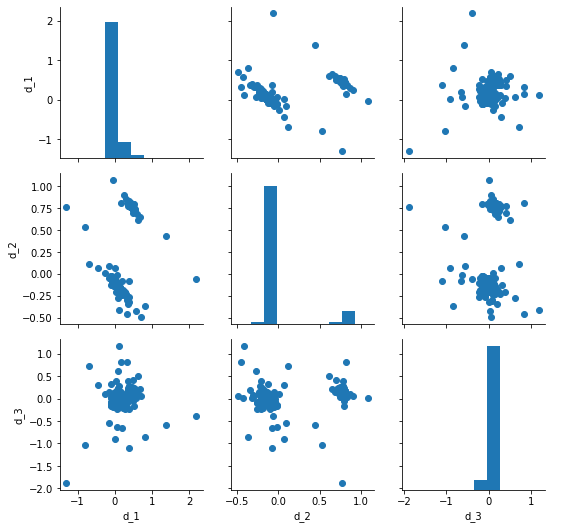

In [73]:
g = sns.PairGrid(tad_mds)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x17d1f3f70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


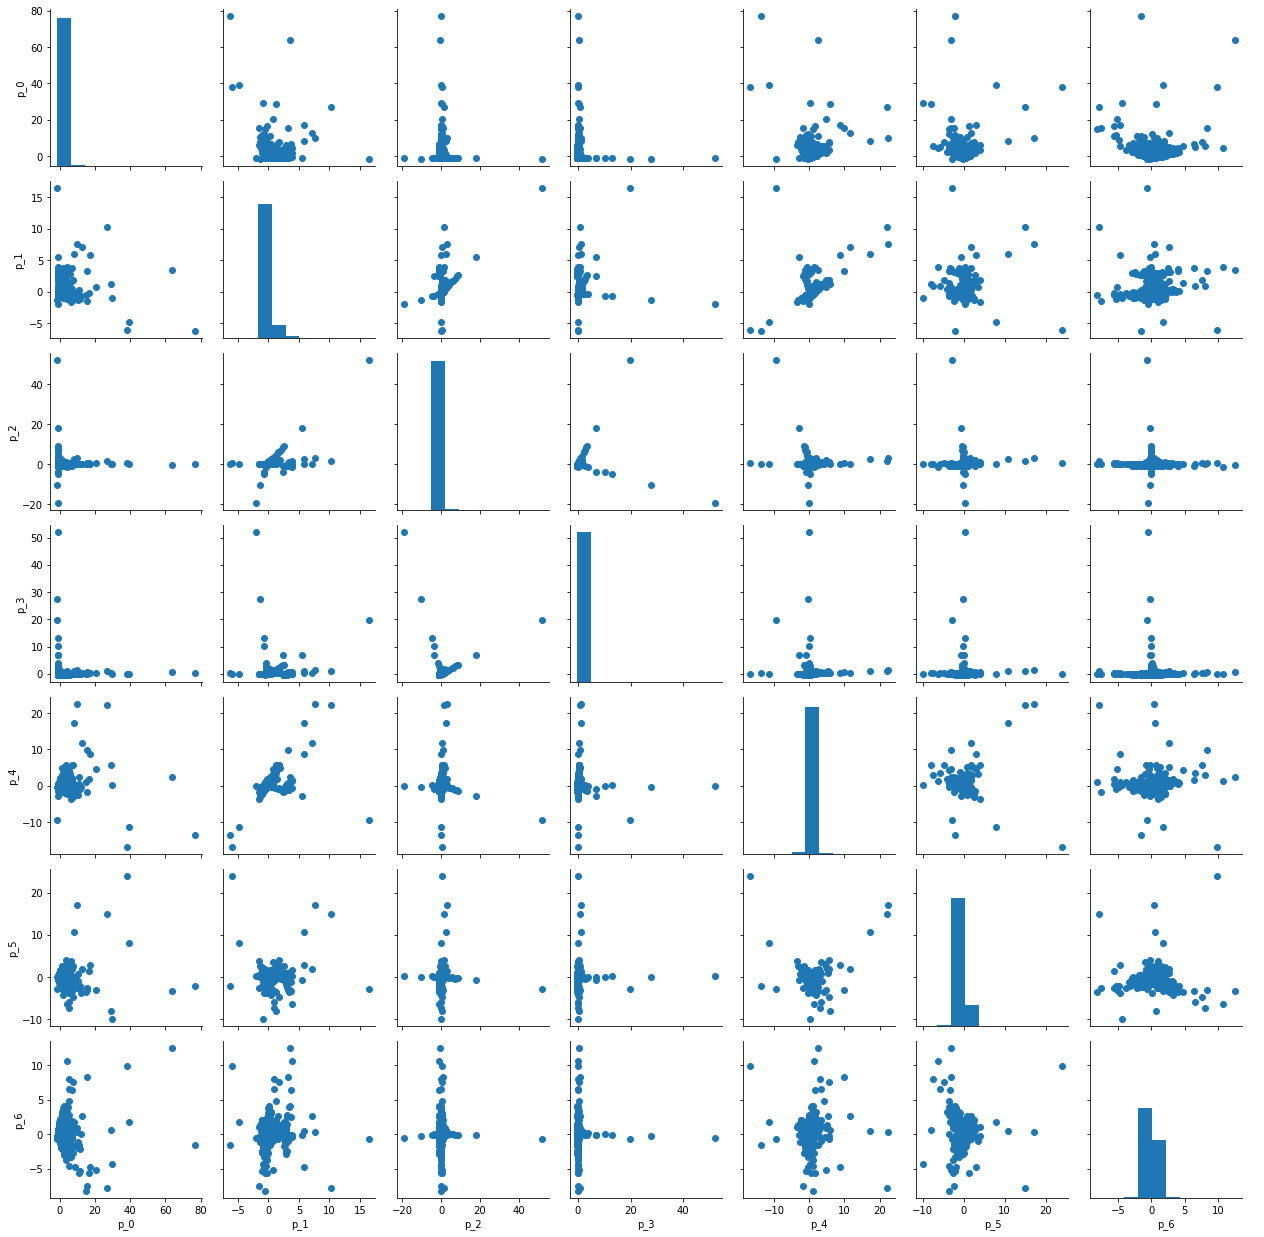

In [74]:
g = sns.PairGrid(tad_pca)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

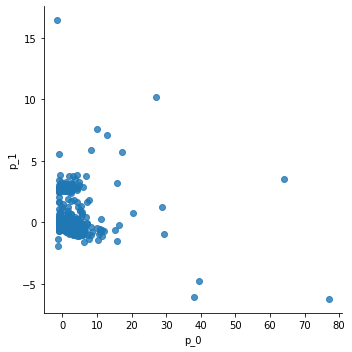

In [75]:
sns.lmplot(data=tad_pca, x='p_0', y='p_1', fit_reg=False)

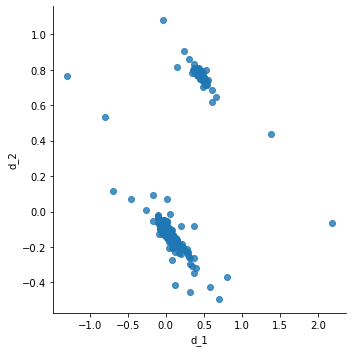

In [76]:
sns.lmplot(data=tad_mds, x='d_1', y='d_2', fit_reg=False)

In [77]:
import plotly.express as px
fig = px.scatter_3d(tad_mds, x='d_1', y='d_2', z='d_3')
fig.show()

In [78]:
fig = px.scatter_3d(tad_pca, x='p_0', y='p_1', z='p_2')
fig.show()

In [79]:
del(pca)
del(mds)

In [80]:
del(df)

# 4. Propuestas de algoritmos y segmentos.

### Dadas las visualizaciones anteriores, podemos presupones que existen un total de 3 clusters.

### Así mismo, se probarán dos tipos de algoritmos, los aglomerativos tanto con promedio como por ward, y k means


In [81]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#### Visualizamos el dendrograma

In [82]:
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [83]:
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model1 = model1.fit(tad_mds)

Text(0.5, 0, 'Número de puntos por nodo')

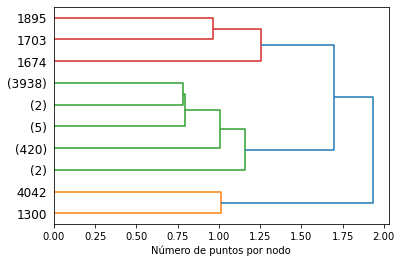

In [84]:
plot_dendrogram(model1, orientation='right', truncate_mode='lastp', p=10)
plt.xlabel('Número de puntos por nodo')

Con tolerancia de 2, se obtienen 3 clusters, k = 3

In [85]:
k_agg = 3

Text(0.5, 0, 'Número de puntos por nodo')

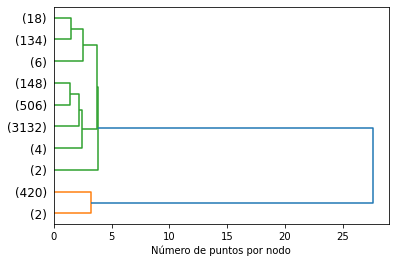

In [86]:
# Modelo 2 (WARD):
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model2 = model2.fit(tad_mds)


plot_dendrogram(model2, orientation='right', truncate_mode='lastp', p=10)
plt.xlabel('Número de puntos por nodo')

con k = 3 se obtienen 5 clusters con el método de ward

In [87]:
k_ward = 5

Text(0, 0.5, 'Inercia')

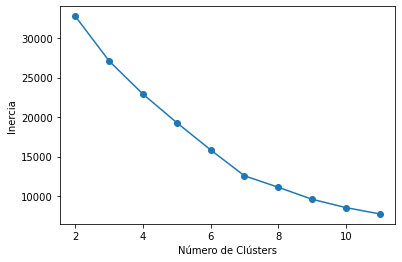

In [88]:
inertias = []
for k in range(2,12):
    kmeans = KMeans(k)
    kmeans.fit(tad_pca)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 12), inertias, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')

Según la regla del codo, son 7 clusters

In [89]:
k_elbow = 7
k_agg = 3
k_ward = 2
k_mds = 2
k_pca = 3

# 5. Ajuste de los algoritmos.

In [90]:
# Escalamiento del espacio
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
tad_mm = pd.DataFrame(mm.fit_transform(tad), columns = tad.columns)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
tad_ss = pd.DataFrame(ss.fit_transform(tad), columns = tad.columns)

In [91]:
# Jerárquico Promedio
model_agg = AgglomerativeClustering(distance_threshold=None, n_clusters=k_agg, linkage='average')
model_agg.fit(tad_mm)

predictions = model_agg.fit_predict(tad_mm)
tad_pca['cl_agg'] = predictions
tad_mds['cl_agg'] = predictions

# Jerárquico Ward
model_ward = AgglomerativeClustering(distance_threshold=None, n_clusters=k_ward, linkage='ward')
model_ward.fit(tad_mm)

predictions = model_ward.fit_predict(tad_mm)
tad_pca['cl_ward'] = predictions
tad_mds['cl_ward'] = predictions


In [92]:
# PCA,MDS=3 utilizando KMeans

kmeans_mds = KMeans(k_mds)
kmeans_mds.fit(tad_mm)

predictions = kmeans_mds.predict(tad_mm)
tad_mds['cl_kmds'] = predictions
tad_pca['cl_kmds'] = predictions


kmeans_pca = KMeans(k_pca)
kmeans_pca.fit(tad_mm)

predictions = kmeans_pca.predict(tad_mm)
tad_mds['cl_kpca'] = predictions
tad_pca['cl_kpca'] = predictions

# elbow=7 utilizando KMeans
kmeans_elbow = KMeans(k_elbow)
kmeans_elbow.fit(tad_mm)

predictions = kmeans_elbow.predict(tad_mm)
tad_mds['cl_elbow'] = predictions
tad_pca['cl_elbow'] = predictions

# 6. Evaluación de los resultados (análisis del sentido de los subgrupos).

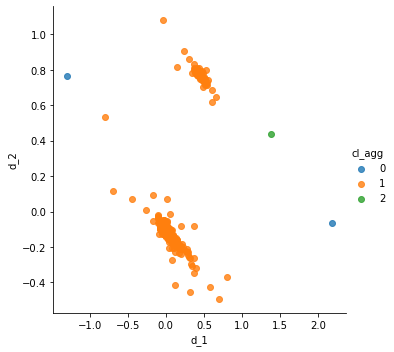

In [93]:
# Promedio
# MDS
sns.lmplot(data=tad_mds, x='d_1', y='d_2', fit_reg=False, hue='cl_agg')

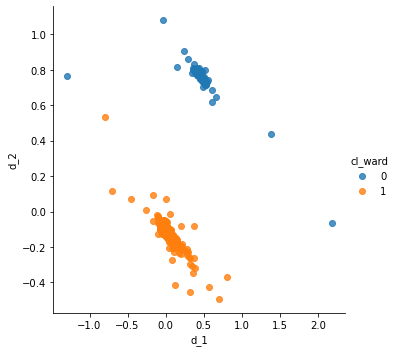

In [94]:
# WARD
# MDS
sns.lmplot(data=tad_mds, x='d_1', y='d_2', fit_reg=False, hue='cl_ward')

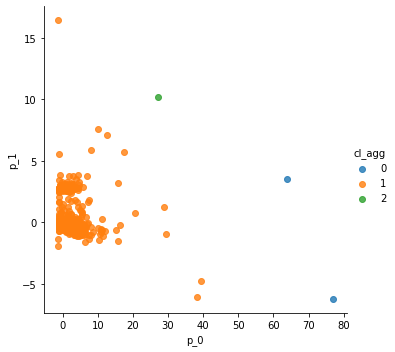

In [95]:
# Promedio
# PCA
sns.lmplot(data=tad_pca, x='p_0', y='p_1', fit_reg=False, hue='cl_agg')

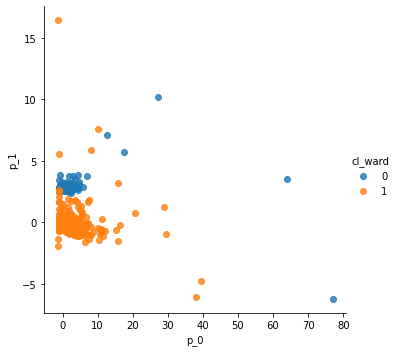

In [96]:
# WARD
# PCA
sns.lmplot(data=tad_pca, x='p_0', y='p_1', fit_reg=False, hue='cl_ward')

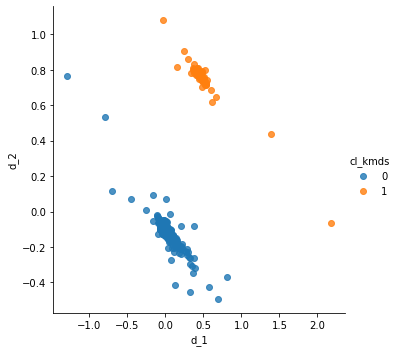

In [97]:
# K-means
#MDS
sns.lmplot(data=tad_mds, x='d_1', y='d_2', fit_reg=False, hue='cl_kmds')

In [98]:
tad_mds['cl_kmds'].value_counts()

0    3950
1     422
Name: cl_kmds, dtype: int64

In [99]:
import plotly.express as px
fig = px.scatter_3d(tad_mds, x='d_1', y='d_2', z='d_3', color='cl_kmds')
fig.show()

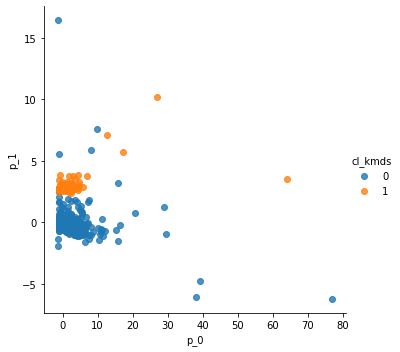

In [100]:
# K-means
#PCA
sns.lmplot(data=tad_pca, x='p_0', y='p_1', fit_reg=False, hue='cl_kmds')

In [101]:

fig = px.scatter_3d(tad_pca, x='p_0', y='p_1', z='p_2', color='cl_kmds')
fig.show()

In [102]:

fig = px.scatter_3d(tad_pca, x='p_0', y='p_1', z='p_2', color='cl_kpca')
fig.show()

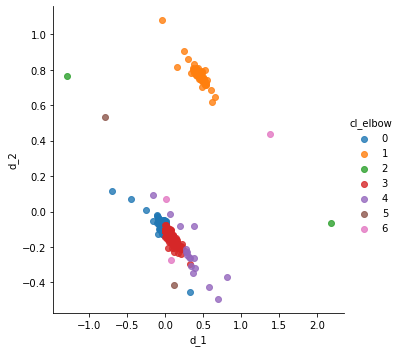

In [103]:
# KMeans-elbow
# MDS
sns.lmplot(data=tad_mds, x='d_1', y='d_2', fit_reg=False, hue='cl_elbow')

In [104]:
fig = px.scatter_3d(tad_mds, x='d_1', y='d_2', z='d_3', color='cl_elbow')
fig.show()

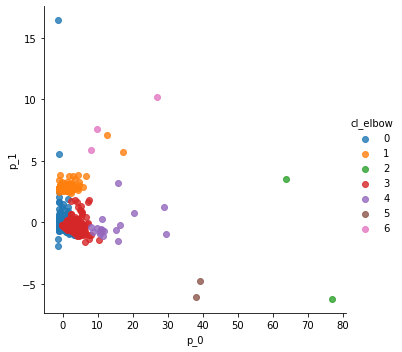

In [105]:
# KMeans-elbow
# PCA
sns.lmplot(data=tad_pca, x='p_0', y='p_1', fit_reg=False, hue='cl_elbow')

In [106]:
fig = px.scatter_3d(tad_pca, x='p_0', y='p_1', z='p_2', color='cl_elbow')
fig.show()

# 7. Nombrar los subgrupos con base a lo encontrado en cada uno.
    * Ejemplo: En el caso de los clubes, pudimos haber nombrado al grupo de alto nivel de transacciones que eran 19 con transacciones superiores a 70, como el grupo de los "ricos". Por otra parte el grupo sin compras, y con muchas ventas puede ser denominado los "canteranos", porque desarrollan jugadores y los vende. La idea es crear estos nombres para los segmentos de clientes que ustedes creen. 

In [107]:
tad.head(5)

Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
CustomerID                                                            
12346.0           1          1        1          0                2   
12347.0           0        182        0          0              182   
12348.0           0         31        0          0               31   
12349.0           0         73        0          0               73   
12350.0           0         17        0          0               17   

            total_money_transaction  mean_x_transaction  mean_unit_price  \
CustomerID                                                                 
12346.0                        0.00            0.000000         1.040000   
12347.0                     4310.00           13.505495         2.644011   
12348.0                     1797.24           75.516129         5.764839   
12349.0                     1757.55            8.643836         8.289041   
12350.0                      334.40           11.588235         3.841176   

              Q1    Q2    Q3    Q4  
CustomerID                          
12346.0      2.0   0.0   0.0   0.0  
12347.0     29.0  42.0  22.0  89.0  
12348.0      6.0   5.0   3.0  17.0  
12349.0      0.0   0.0   0.0  73.0  
12350.0     17.0   0.0   0.0   0.0

In [108]:
tad.tail(5)

Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
CustomerID                                                            
18280.0           1         10        0          0               10   
18281.0           1          7        0          0                7   
18282.0           1         12        1          0               13   
18283.0           1        756        0          0              756   
18287.0           1         70        0          0               70   

            total_money_transaction  mean_x_transaction  mean_unit_price  \
CustomerID                                                                 
18280.0                      180.60            4.500000         4.765000   
18281.0                       80.82            7.714286         5.622857   
18282.0                      176.60            7.538462         4.821538   
18283.0                     2094.88            1.847884         1.614987   
18287.0                     1837.28           22.657143         1.493571   

               Q1     Q2     Q3     Q4  
CustomerID                              
18280.0      10.0    0.0    0.0    0.0  
18281.0       0.0    7.0    0.0    0.0  
18282.0       0.0    0.0    8.0    5.0  
18283.0     132.0  211.0  104.0  309.0  
18287.0       0.0   29.0    0.0   41.0

In [109]:
tad.reset_index(inplace=True)

In [110]:
tad['cl_kmds'] = tad_mds['cl_kmds'].copy()

In [111]:
tad

CustomerID  Country  tot_purch  tot_dev  off_purch  tot_tansactions  \
0        12346.0        1          1        1          0                2   
1        12347.0        0        182        0          0              182   
2        12348.0        0         31        0          0               31   
3        12349.0        0         73        0          0               73   
4        12350.0        0         17        0          0               17   
...          ...      ...        ...      ...        ...              ...   
4367     18280.0        1         10        0          0               10   
4368     18281.0        1          7        0          0                7   
4369     18282.0        1         12        1          0               13   
4370     18283.0        1        756        0          0              756   
4371     18287.0        1         70        0          0               70   

      total_money_transaction  mean_x_transaction  mean_unit_price     Q1  \
0                        0.00            0.000000         1.040000    2.0   
1                     4310.00           13.505495         2.644011   29.0   
2                     1797.24           75.516129         5.764839    6.0   
3                     1757.55            8.643836         8.289041    0.0   
4                      334.40           11.588235         3.841176   17.0   
...                       ...                 ...              ...    ...   
4367                   180.60            4.500000         4.765000   10.0   
4368                    80.82            7.714286         5.622857    0.0   
4369                   176.60            7.538462         4.821538    0.0   
4370                  2094.88            1.847884         1.614987  132.0   
4371                  1837.28           22.657143         1.493571    0.0   

         Q2     Q3     Q4  cl_kmds  
0       0.0    0.0    0.0        0  
1      42.0   22.0   89.0        1  
2       5.0    3.0   17.0        1  
3       0.0    0.0   73.0        1  
4       0.0    0.0    0.0        1  
...     ...    ...    ...      ...  
4367    0.0    0.0    0.0        0  
4368    7.0    0.0    0.0        0  
4369    0.0    8.0    5.0        0  
4370  211.0  104.0  309.0        0  
4371   29.0    0.0   41.0        0  

[4372 rows x 14 columns]

In [112]:
tad[['cl_kmds', 'total_money_transaction']].groupby('cl_kmds').agg(['sum', 'mean','count'])

total_money_transaction                   
                            sum         mean count
cl_kmds                                           
0                   6767873.394  1713.385669  3950
1                   1532192.420  3630.787725   422

In [113]:
tad[['cl_kmds', 'tot_purch', 'tot_dev', 'off_purch' ]].groupby('cl_kmds').agg(['count'])

tot_purch tot_dev off_purch
            count   count     count
cl_kmds                            
0            3950    3950      3950
1             422     422       422

Los clientes del segmento 2 hacen pocas transacciones, pero de alto valor en cada una, los clientes del segmento 0 son los que más transaccionan

In [114]:
tad[['cl_kmds', 'total_money_transaction' ,'Q1', 'Q2', 'Q3', 'Q4']].groupby('cl_kmds').agg(['mean'])

total_money_transaction         Q1         Q2         Q3         Q4
                           mean       mean       mean       mean       mean
cl_kmds                                                                    
0                   1713.385669  15.553165  18.073924  21.297722  36.689873
1                   3630.787725  20.526066  20.260664  28.104265  37.627962

Es probable que las ventas en Q4 tengan relación con las compras navideñas, por lo que no se espera que cambien su comportamiento. Un programa de lealtar podría incluir ofertas durante el primer semestre del año para elevar el promedio de dinero ingresado en esos dos trimestres.

# 8. Realizar el análisis de negocio e identificar los beneficios de aplicar el programa de lealtad. Alguna propuesta de programa de recompensas basado en el nivel de lealtad del cliente. 

Revisar presentación

In [116]:
import random
import plotly.graph_objects as go
import pandas as pd
import gif

# Pandas DataFrame with random data
df = pd.DataFrame({
    't': list(range(10)) * 10,
    'x': [random.randint(0, 100) for _ in range(100)],
    'y': [random.randint(0, 100) for _ in range(100)]
})

# Gif function definition
@gif.frame
def plot(i):
    d = df[df['t'] == i]
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=d["x"],
        y=d["y"],
        mode="markers"
    ))
    fig.update_layout(width=500, height=300)
    return fig

# Construct list of frames
frames = []
for i in range(10):
    frame = plot(i)
    frames.append(frame)

# Save gif from frames with a specific duration for each frame in ms
gif.save(frames, 'example.gif', duration=100)